In [1]:
! mkdir chest_dataset
! unzip /content/drive/MyDrive/COVID-19_Radiography_Database_old.zip -d chest_dataset

Streaming output truncated to the last 5000 lines.
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: chest_dataset/COVID-19_Radiography_Dataset/Nor

In [17]:
covid = '/content/chest_dataset/COVID-19_Radiography_Dataset/COVID'
normal = '/content/chest_dataset/COVID-19_Radiography_Dataset/Normal'
pneumonia = '/content/chest_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia'
lungo = '/content/chest_dataset/COVID-19_Radiography_Dataset/Lung_Opacity'

import random
import os
import pandas as pd
random.seed(42)
file_names = os.listdir(covid) + os.listdir(normal) + os.listdir(pneumonia) + os.listdir(lungo)


categ = []
for filename in file_names:
    category = filename.split('-')[0]
    if category == 'COVID':
        categ.append(str(3))
    elif category == 'Viral Pneumonia':
        categ.append(str(2))
    elif category == 'Lung_Opacity':
        categ.append(str(1))
    else:
        categ.append(str(0))


for i in range(len(file_names)):
    if 'COVID' in file_names[i]:
        file_names[i] = os.path.join(covid, file_names[i])
    elif 'Viral Pneumonia' in file_names[i]:
        file_names[i] = os.path.join(pneumonia, file_names[i])
    elif 'Lung_Opacity' in file_names[i]:
        file_names[i] = os.path.join(lungo, file_names[i])
    else:
        file_names[i] = os.path.join(normal, file_names[i])
    
    
df = pd.DataFrame({
    'filename': file_names,
    'category': categ
})

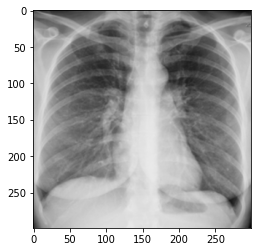

In [113]:
import matplotlib.pyplot as plt
sample = random.choice(df['filename'])
image = load_img(sample)
plt.imshow(image)
plt.show()


from sklearn.model_selection import train_test_split
train_data, test_valid_data = train_test_split(df, test_size=0.3, random_state = 42, shuffle=True, stratify=df['category'])
train_data = train_data.reset_index(drop=True)
test_valid_data = test_valid_data.reset_index(drop=True)


test_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state = 42,
                                         shuffle=True, stratify=test_valid_data['category'])
test_data = test_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

/content/chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-7547.png
Normal
True value is : Normal
1/1 [==============================] - 1s 664ms/step
[1 0 1]
Prediction is:
Normal


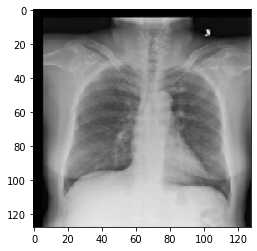

In [16]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf 
import numpy as np

model = tf.keras.models.load_model('/content/iv3_model.h5')

sample = random.choice(test_data['filename'])
print(sample)

# category = sample.split('-')[1]
category = sample.split('/')[-1].split('-')[0]

print(category)
true = ''
if category == 'COVID':
    true = 'COVID'
elif category == 'Viral Pneumonia':
    true = 'Viral Pneumonia'
elif category == 'Lung_Opacity':
    true = 'Lung_Opacity'
else:
    true = 'Normal'

print(f'True value is : {true}')
    
image = load_img(sample, target_size=(128, 128))
img = img_to_array(image)
img = img.reshape((3, 128, 128, 1))

result = model.predict(img)
result = np.argmax(result, axis=-1)
print(result)
print('Prediction is:')
if result.all() == 0:
    print("Normal")
elif result.all() == 2:
    print("Lung_Opacity")
elif result.all() == 1:
    print("Viral Pneumonia")
else:
    print("COVID +")
    
plt.imshow(image)

/content/chest_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1250.png
Viral Pneumonia
True value is : Viral Pneumonia
1/1 [==============================] - 1s 563ms/step
[1 1 1]
Prediction is:
Viral Pneumonia


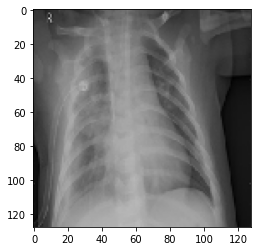

In [126]:
sample = random.choice(test_data['filename'])
print(sample)

# category = sample.split('-')[1]
category = sample.split('/')[-1].split('-')[0]

print(category)
true = ''
if category == 'COVID':
    true = 'COVID'
elif category == 'Viral Pneumonia':
    true = 'Viral Pneumonia'
elif category == 'Lung_Opacity':
    true = 'Lung_Opacity'
else:
    true = 'Normal'

print(f'True value is : {true}')
    
image = load_img(sample, target_size=(128, 128))
img = img_to_array(image)
img = img.reshape((3, 128, 128, 1))

result = model.predict(img)
result = np.argmax(result, axis=-1)
print(result)
print('Prediction is:')
if result.all() == 0:
    print("Normal")
elif result.all() == 2:
    print("Lung_Opacity")
elif result.all() == 1:
    print("Viral Pneumonia")
else:
    print("COVID +")
    
plt.imshow(image)

/content/chest_dataset/COVID-19_Radiography_Dataset/Normal/Normal-1066.png
Normal
True value is : Normal
1/1 [==============================] - 1s 714ms/step
[0 1 1]
Prediction is:
Normal


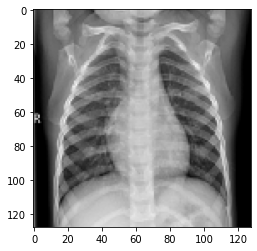

In [153]:
sample = random.choice(test_data['filename'])
print(sample)

category = sample.split('/')[-1].split('-')[0]

print(category)
true = ''
if category == 'COVID':
    true = 'COVID'
elif category == 'Viral Pneumonia':
    true = 'Viral Pneumonia'
elif category == 'Lung_Opacity':
    true = 'Lung_Opacity'
else:
    true = 'Normal'

print(f'True value is : {true}')
    
image = load_img(sample, target_size=(128, 128))
img = img_to_array(image)
img = img.reshape((3, 128, 128, 1))

result = model.predict(img)
result = np.argmax(result, axis=-1)
print(result)
print('Prediction is:')
if result.all() == 0:
    print("Normal")
elif result.all() == 2:
    print("Lung_Opacity")
elif result.all() == 1:
    print("Viral Pneumonia")
else:
    print("COVID +")
    
plt.imshow(image)

/content/chest_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-433.png
Viral Pneumonia
True value is : Viral Pneumonia
1/1 [==============================] - 1s 553ms/step
[1 1 1]
Prediction is:
Viral Pneumonia


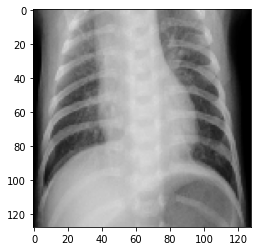

In [50]:
sample = random.choice(test_data['filename'])
print(sample)

# category = sample.split('-')[1]
category = sample.split('/')[-1].split('-')[0]

print(category)
true = ''
if category == 'COVID':
    true = 'COVID'
elif category == 'Viral Pneumonia':
    true = 'Viral Pneumonia'
elif category == 'Lung_Opacity':
    true = 'Lung_Opacity'
else:
    true = 'Normal'

print(f'True value is : {true}')
    
image = load_img(sample, target_size=(128, 128))
img = img_to_array(image)
img = img.reshape((3, 128, 128, 1))

result = model.predict(img)
result = np.argmax(result, axis=-1)
print(result)
print('Prediction is:')
if result.all() == 0:
    print("Normal")
elif result.all() == 2:
    print("Lung_Opacity")
elif result.all() == 1:
    print("Viral Pneumonia")
else:
    print("COVID +")
    
plt.imshow(image)